In [172]:
import pandas as pd

### Scraping the batting data from ESPN STATS GURU and Data Preperation

In [173]:
appended_df_bat = []
for i in range(1,46):
    link="https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;page={};template=results;type=batting".format(i)
    data = pd.read_html(link)[2]
    appended_df_bat.append(data)
df_bat = pd.concat(appended_df_bat)

In [175]:
df_bat = df_bat.drop('Unnamed: 15', 1)

In [176]:
df_bat=df_bat.replace('-',0)

In [177]:
df_bat=df_bat[df_bat['Inns'].astype(int)>10]
df_bat=df_bat[df_bat['Runs'].astype(int)>200]

In [178]:
df_bat

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2010-2021,90,84,24,3159,94*,52.65,2272,139.04,0,28,3,285,90
1,MJ Guptill (NZ),2009-2021,102,98,7,2939,105,32.29,2148,136.82,2,17,3,256,147
2,RG Sharma (INDIA),2007-2021,111,103,15,2864,118,32.54,2061,138.96,4,22,6,252,133
3,AJ Finch (AUS),2011-2021,76,75,10,2439,172,37.52,1623,150.27,2,15,5,242,107
4,Mohammad Hafeez (PAK),2006-2021,107,100,11,2412,99*,27.1,1988,121.32,0,14,7,241,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Simi Singh (IRE),2018-2020,24,23,4,207,57*,10.89,178,116.29,0,1,6,13,7
35,DL Vettori (NZ),2007-2014,34,22,6,205,38,12.81,190,107.89,0,0,3,14,2
40,J Botha (SA),2006-2012,40,20,9,201,34,18.27,165,121.81,0,0,1,15,9
41,WIA Fernando (SL),2019-2021,17,16,0,201,37,12.56,208,96.63,0,0,2,16,4


In [179]:
df_bat['50+']=df_bat['100']+df_bat['50']
df_bat['Boundaries']=df_bat['4s']+df_bat['6s']

In [180]:
df_bat=df_bat[['Player','Inns','NO','Ave','SR','50+','Boundaries']]

In [181]:
df_bat

,Player,Inns,NO,Ave,SR,50+,Boundaries
0,V Kohli (INDIA),84,24,52.65,139.04,28,375
1,MJ Guptill (NZ),98,7,32.29,136.82,19,403
2,RG Sharma (INDIA),103,15,32.54,138.96,26,385
3,AJ Finch (AUS),75,10,37.52,150.27,17,349
4,Mohammad Hafeez (PAK),100,11,27.1,121.32,14,315
...,...,...,...,...,...,...,...
30,Simi Singh (IRE),23,4,10.89,116.29,1,20
35,DL Vettori (NZ),22,6,12.81,107.89,0,16
40,J Botha (SA),20,9,18.27,121.81,0,24
41,WIA Fernando (SL),16,0,12.56,96.63,0,20


In [182]:
df_bat['Inns']=df_bat['Inns'].astype(float)
df_bat['NO']=df_bat['NO'].astype(float)
df_bat['Ave']=df_bat['Ave'].astype(float)
df_bat['SR']=df_bat['SR'].astype(float)
df_bat['50+']=df_bat['50+'].astype(float)
df_bat['Boundaries']=df_bat['Boundaries'].astype(float)

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [183]:
def normalize_series(s):
    return (s - s.min()) / (s.max() - s.min())

In [184]:
df_bat['Inns'] = normalize_series(df_bat['Inns'])
df_bat['NO'] = normalize_series(df_bat['NO'])
df_bat['Ave'] = normalize_series(df_bat['Ave'])
df_bat['SR'] = normalize_series(df_bat['SR'])
df_bat['50+'] =normalize_series(df_bat['50+'])
df_bat['Boundaries'] = normalize_series(df_bat['Boundaries'])

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [185]:
df_bat

,Player,Inns,NO,Ave,SR,50+,Boundaries
0,V Kohli (INDIA),0.768421,0.571429,0.868174,0.519405,1.000000,0.928021
1,MJ Guptill (NZ),0.915789,0.166667,0.453341,0.497537,0.678571,1.000000
2,RG Sharma (INDIA),0.968421,0.357143,0.458435,0.518617,0.928571,0.953728
3,AJ Finch (AUS),0.673684,0.238095,0.559902,0.630024,0.607143,0.861183
4,Mohammad Hafeez (PAK),0.936842,0.261905,0.347596,0.344858,0.500000,0.773779
...,...,...,...,...,...,...,...
30,Simi Singh (IRE),0.126316,0.095238,0.017319,0.295311,0.035714,0.015424
35,DL Vettori (NZ),0.115789,0.142857,0.056438,0.212569,0.000000,0.005141
40,J Botha (SA),0.094737,0.214286,0.167685,0.349685,0.000000,0.025707
41,WIA Fernando (SL),0.052632,0.000000,0.051345,0.101655,0.000000,0.015424


In [186]:
df_bat['rank']=(0.1*df_bat['Inns'])+ (0.05*df_bat['NO'])+ (0.25*df_bat['Ave'])+ (0.25*df_bat['SR'])+ (0.15*df_bat['50+'])+(0.2*df_bat['Boundaries'])  

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
df_bat=df_bat[['Player','rank']]

In [188]:
df_bat=df_bat.sort_values(['rank'],ascending=False)

In [189]:
lst=df_bat['Player'].tolist()

In [190]:
result=[]
n = 5
for i in range(len(lst)-n+1):
    batch = lst[i:i+n]
    result.append(batch)

### Scraping the bowling data from ESPN STATS GURU and Data Preperation

In [191]:
appended_df_bowl = []
for i in range(1,46):
    link="https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;page={};template=results;type=bowling".format(i)
    data = pd.read_html(link)[2]
    appended_df_bowl.append(data)
df_bowl = pd.concat(appended_df_bowl)

In [192]:
df_bowl.head(1)

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Unnamed: 14
0,SL Malinga (SL),2006-2020,84,83,299.5,1,2225,107,5/6,20.79,7.42,16.8,1,2,NaN


In [193]:
df_bowl = df_bowl.drop('Unnamed: 14', 1)

In [194]:
df_bowl=df_bowl[df_bowl['Mat']>=10]

In [195]:
df_bowl=df_bowl.replace('-',0)

In [196]:
df_bowl

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,SL Malinga (SL),2006-2020,84,83,299.5,1,2225,107,5/6,20.79,7.42,16.8,1,2
1,TG Southee (NZ),2008-2021,83,81,297.0,2,2492,99,5/18,25.17,8.39,18,1,1
2,Shahid Afridi (ICC/PAK),2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0
3,Rashid Khan (AFG/ICC),2015-2021,51,51,193.0,1,1200,95,5/3,12.63,6.21,12.1,3,2
4,Shakib Al Hasan (BDESH),2006-2019,76,75,277.5,2,1894,92,5/20,20.58,6.81,18.1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,CAK Walton (WI),2014-2018,19,0,0.0,0,0,0,0,0,0.00,0,0,0
40,DA Warner (AUS),2009-2020,81,0,0.0,0,0,0,0,0,0.00,0,0,0
43,DF Watts (SCOT),2007-2012,11,0,0.0,0,0,0,0,0,0.00,0,0,0
49,GC Wilson (IRE),2008-2020,81,0,0.0,0,0,0,0,0,0.00,0,0,0


In [248]:
df_bowl=df_bowl[df_bowl['Inns']>10]

In [197]:
df_bowl=df_bowl[df_bowl['Wkts']>20]

In [198]:
df_bowl

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,SL Malinga (SL),2006-2020,84,83,299.5,1,2225,107,5/6,20.79,7.42,16.8,1,2
1,TG Southee (NZ),2008-2021,83,81,297.0,2,2492,99,5/18,25.17,8.39,18,1,1
2,Shahid Afridi (ICC/PAK),2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0
3,Rashid Khan (AFG/ICC),2015-2021,51,51,193.0,1,1200,95,5/3,12.63,6.21,12.1,3,2
4,Shakib Al Hasan (BDESH),2006-2019,76,75,277.5,2,1894,92,5/20,20.58,6.81,18.1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Fareed Ahmad (AFG),2016-2021,16,16,54.5,0,457,21,3/35,21.76,8.33,15.6,0,0
35,Mohammad Sami (PAK),2010-2016,13,13,46.0,0,387,21,3/16,18.42,8.41,13.1,0,0
36,B Muzarabani (ZIM),2018-2021,15,15,57.5,0,496,21,3/21,23.61,8.57,16.5,0,0
37,Simi Singh (IRE),2018-2020,24,24,60.2,0,496,21,3/15,23.61,8.22,17.2,0,0


In [199]:
df_bowl['4+']=df_bowl['4']+df_bowl['5']

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
df_bowl=df_bowl[['Player','Inns','Wkts','Ave','Econ','SR','4+']]

In [201]:
df_bowl['Inns']=df_bowl['Inns'].astype(float)
df_bowl['Wkts']=df_bowl['Wkts'].astype(float)
df_bowl['Ave']=df_bowl['Ave'].astype(float)
df_bowl['Econ']=df_bowl['Econ'].astype(float)
df_bowl['SR']=df_bowl['SR'].astype(float)
df_bowl['4+']=df_bowl['4+'].astype(float)

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [202]:
df_bowl

,Player,Inns,Wkts,Ave,Econ,SR,4+
0,SL Malinga (SL),83.0,107.0,20.79,7.42,16.8,3.0
1,TG Southee (NZ),81.0,99.0,25.17,8.39,18.0,2.0
2,Shahid Afridi (ICC/PAK),97.0,98.0,24.44,6.63,22.1,3.0
3,Rashid Khan (AFG/ICC),51.0,95.0,12.63,6.21,12.1,5.0
4,Shakib Al Hasan (BDESH),75.0,92.0,20.58,6.81,18.1,4.0
...,...,...,...,...,...,...,...
34,Fareed Ahmad (AFG),16.0,21.0,21.76,8.33,15.6,0.0
35,Mohammad Sami (PAK),13.0,21.0,18.42,8.41,13.1,0.0
36,B Muzarabani (ZIM),15.0,21.0,23.61,8.57,16.5,0.0
37,Simi Singh (IRE),24.0,21.0,23.61,8.22,17.2,0.0


In [203]:
df_bowl['Inns'] = normalize_series(df_bowl['Inns'])
df_bowl['Wkts'] = normalize_series(df_bowl['Wkts'])
df_bowl['Ave'] = normalize_series(df_bowl['Ave'])
df_bowl['Econ'] = normalize_series(df_bowl['Econ'])
df_bowl['SR'] =normalize_series(df_bowl['SR'])
df_bowl['4+'] = normalize_series(df_bowl['4+'])

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [204]:
df_bowl

,Player,Inns,Wkts,Ave,Econ,SR,4+
0,SL Malinga (SL),0.839080,1.000000,0.426747,0.517815,0.371728,0.500000
1,TG Southee (NZ),0.816092,0.906977,0.582121,0.748219,0.434555,0.333333
2,Shahid Afridi (ICC/PAK),1.000000,0.895349,0.556226,0.330166,0.649215,0.500000
3,Rashid Khan (AFG/ICC),0.471264,0.860465,0.137283,0.230404,0.125654,0.833333
4,Shakib Al Hasan (BDESH),0.747126,0.825581,0.419298,0.372922,0.439791,0.666667
...,...,...,...,...,...,...,...
34,Fareed Ahmad (AFG),0.068966,0.000000,0.461156,0.733967,0.308901,0.000000
35,Mohammad Sami (PAK),0.034483,0.000000,0.342675,0.752969,0.178010,0.000000
36,B Muzarabani (ZIM),0.057471,0.000000,0.526783,0.790974,0.356021,0.000000
37,Simi Singh (IRE),0.160920,0.000000,0.526783,0.707838,0.392670,0.000000


In [205]:
df_bowl['Ave']=1-df_bowl['Ave']
df_bowl['Econ']=1-df_bowl['Econ']
df_bowl['SR']=1-df_bowl['SR']

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [206]:
df_bowl

,Player,Inns,Wkts,Ave,Econ,SR,4+
0,SL Malinga (SL),0.839080,1.000000,0.573253,0.482185,0.628272,0.500000
1,TG Southee (NZ),0.816092,0.906977,0.417879,0.251781,0.565445,0.333333
2,Shahid Afridi (ICC/PAK),1.000000,0.895349,0.443774,0.669834,0.350785,0.500000
3,Rashid Khan (AFG/ICC),0.471264,0.860465,0.862717,0.769596,0.874346,0.833333
4,Shakib Al Hasan (BDESH),0.747126,0.825581,0.580702,0.627078,0.560209,0.666667
...,...,...,...,...,...,...,...
34,Fareed Ahmad (AFG),0.068966,0.000000,0.538844,0.266033,0.691099,0.000000
35,Mohammad Sami (PAK),0.034483,0.000000,0.657325,0.247031,0.821990,0.000000
36,B Muzarabani (ZIM),0.057471,0.000000,0.473217,0.209026,0.643979,0.000000
37,Simi Singh (IRE),0.160920,0.000000,0.473217,0.292162,0.607330,0.000000


In [207]:
df_bowl['rank']=(0.05*df_bowl['Inns'])+ (0.1*df_bowl['Wkts'])+ (0.25*df_bowl['Ave'])+ (0.25*df_bowl['Econ'])+ (0.25*df_bowl['SR'])+(0.1*df_bowl['4+'])  

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
df_bowl=df_bowl[['Player','rank']]

In [209]:
df_bowl

,Player,rank
0,SL Malinga (SL),0.612882
1,TG Southee (NZ),0.473612
2,Shahid Afridi (ICC/PAK),0.555633
3,Rashid Khan (AFG/ICC),0.819608
4,Shakib Al Hasan (BDESH),0.628579
...,...,...
34,Fareed Ahmad (AFG),0.377442
35,Mohammad Sami (PAK),0.433311
36,B Muzarabani (ZIM),0.334429
37,Simi Singh (IRE),0.351223


In [210]:
df_bowl=df_bowl.sort_values(['rank'],ascending=False)

In [211]:
df_bowl

,Player,rank
3,Rashid Khan (AFG/ICC),0.819608
17,D Ravu (PNG),0.775897
31,AC Botha (IRE),0.739905
13,BAW Mendis (SL),0.731848
6,Umar Gul (PAK),0.706957
...,...,...
34,I Udana (SL),0.187016
8,Mashrafe Mortaza (BDESH),0.177099
23,Rubel Hossain (BDESH),0.164083
48,AD Russell (WI),0.127729


In [212]:
lst=df_bowl['Player'].tolist()

In [213]:
result_1=[]
n = 5
for i in range(len(lst)-n+1):
    batch = lst[i:i+n]
    result_1.append(batch)

### Training the model 

In [215]:
len(result+result_1)

538

In [216]:
data_train=result+result_1

In [217]:
data_train=data_train*100

In [218]:
from gensim.models import Word2Vec

In [219]:
model = Word2Vec(sentences=data_train, size=300, window=5, min_count=1, workers=4)

### W2V Visualization

In [278]:
keys = ['DA Warner (AUS)','AB de Villiers (SA)','TA Boult (NZ)','R Ashwin (INDIA)','JDS Neesham (NZ)','FA Allen (WI)']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [309]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [310]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

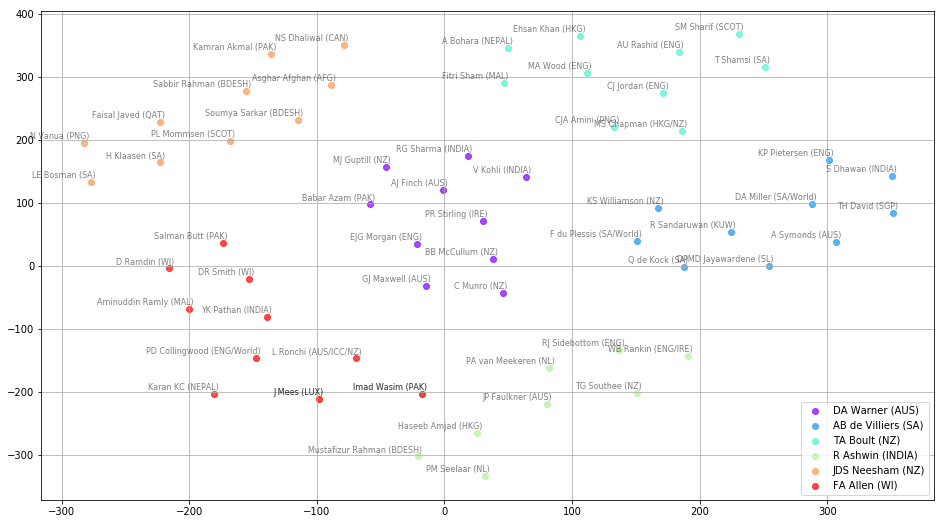

In [313]:
keys = ['DA Warner (AUS)','AB de Villiers (SA)','TA Boult (NZ)','R Ashwin (INDIA)','JDS Neesham (NZ)','FA Allen (WI)']

tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters, 0.7)

#### Let's ask the model to find the most similar player

In [302]:
print(model.wv.most_similar(positive=['AB de Villiers (SA)'])[0][0])

A Symonds (AUS)


In [303]:
print(model.wv.most_similar(positive=['JM Bairstow (ENG)','MS Dhoni (INDIA)'])[0][0])

DP Conway (NZ)


In [304]:
print(model.wv.most_similar(positive=['RG Sharma (INDIA)','RA Jadeja (INDIA)'])[0][0])

Babar Azam (PAK)


#### Analogy difference : Which player is to Jos Buttler as Gayle is to Rahane?

In [305]:
print(model.wv.most_similar(positive=['JC Buttler (ENG)','CH Gayle (WI)'],negative=['AM Rahane (INDIA)'])[0][0])

KL Rahul (INDIA)


In [306]:
print(model.wv.most_similar(positive=['Mohammad Sami (PAK)','SL Malinga (SL)'],negative=['DW Steyn (SA)'])[0][0])

SW Tait (AUS)


#### Odd One Out

In [307]:
print(model.wv.doesnt_match(['V Kohli (INDIA)','RG Sharma (INDIA)','JE Root (ENG)']))

JE Root (ENG)
